In [4]:
import re
from dateutil.parser import *
from dateutil.tz import *
from datetime import *
import pandas as pd


file = open("marathonstaffel.txt", encoding="utf_8")

pattern = re.compile(r"(?P<platz>\d+)\.\t(?P<startnr>\d+)\t(?P<name>.*?)\t(?P<nat>\w+)\t(?P<klasse>\w+)\t(?P<platz_klasse>\d+)\.\t\((?P<brutto>[\d:]+)\)\t(?P<netto>[\d:]+)\t")

df = pd.DataFrame(columns=["platz", "startnr", "name", "nat", "klasse", "platz_klasse", "brutto", "netto"])

for line in file:
    match = re.match(pattern, line)
    if match:
        df = df.append({"platz": int(match.group("platz")),
                        "startnr":  int(match.group("startnr")),
                        "name": match.group("name"),
                        "nat": match.group("nat"),
                        "klasse": match.group("klasse"),
                        "platz_klasse": int(match.group("platz_klasse")),
                        "brutto": parse(match.group("brutto")) - parse("0:00:00"),
                        "netto": parse(match.group("netto")) - parse("0:00:00")
                       }, ignore_index=True)
        # print(int(match.group("platz")), " ", int(match.group("startnr")), match.group("name"), match.group("nat"), 
        #       match.group("klasse"), int(match.group("platz_klasse")), match.group("brutto"), match.group("netto"))
        
print(df.head())


  platz startnr                                 name  nat  klasse  \
0     1    6941                            PST TRIER  GER  Herren   
1     2    7135                   VERRÜCKT NACH MARY  GER   Mixed   
2     3    6827            LAUFSPORT SAUKEL B_FASTER  GER  Herren   
3     4    7192                         MRRC MÜNCHEN  GER  Herren   
4     5    7128  UNDER ARMOUR RUNNING SOCIETY MUNICH  GER   Mixed   

  platz_klasse   brutto    netto  
0            1 02:47:54 02:27:52  
1            1 02:50:03 02:30:01  
2            2 02:51:05 02:31:03  
3            3 02:53:40 02:33:37  
4            2 02:42:59 02:42:51  


In [5]:
print(df.shape)
print(df.info())
print(df.describe())

(693, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 8 columns):
platz           693 non-null object
startnr         693 non-null object
name            693 non-null object
nat             693 non-null object
klasse          693 non-null object
platz_klasse    693 non-null object
brutto          693 non-null timedelta64[ns]
netto           693 non-null timedelta64[ns]
dtypes: object(6), timedelta64[ns](2)
memory usage: 43.4+ KB
None
                       brutto                   netto
count                     693                     693
mean   0 days 04:19:10.926406  0 days 03:58:57.450216
std    0 days 00:26:44.571230  0 days 00:26:20.975969
min           0 days 02:42:59         0 days 02:27:52
25%           0 days 04:01:54         0 days 03:42:30
50%           0 days 04:18:57         0 days 03:58:03
75%           0 days 04:34:37         0 days 04:14:11
max           0 days 05:48:25         0 days 05:27:59


201.65


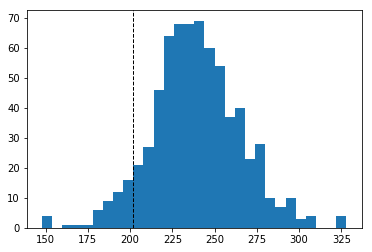

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# convert timedelta objects to minutes
df["brutto_m"] = df["brutto"].dt.total_seconds() / 60.0
df["netto_m"] = df["netto"].dt.total_seconds() / 60.0

# print(df.head())

our_time = float(df[df["name"] == "BMW DATA SCIENCE ITO"].netto_m)
print(our_time)

_ = plt.hist(x=df["netto_m"], bins=30)
_ = plt.axvline(our_time, color='k', linestyle='dashed', linewidth=1)

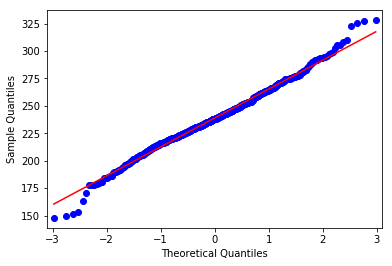

In [9]:
from statsmodels.graphics.gofplots import qqplot

# q-q plot
qqplot(df["netto_m"], line='s')
_ = plt.show()

(238.95750360750358, 26.330581376138404)


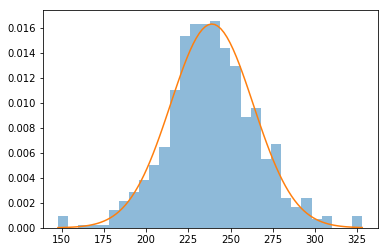

In [27]:
import numpy as np
from scipy import stats

data = df["netto_m"]
(my_loc, my_scale) = stats.norm.fit(data[5:-5])

print(n_dist)
x_space = np.linspace(min(data), max(data), 100)

_ = plt.hist(x=data, bins=30, alpha=0.5, density=True)
_ = plt.plot(x_space, stats.norm.pdf(x_space, my_loc, my_scale))
_ = plt.show()